# Transfer Learning

The model to be used is VGG16, we will train only the FC layers (top layers).


## Examples of pre-trained models

| Model      | Year Published | Parameters (Approx.) | Typical Use Cases                                       | Training Dataset   |
|------------|----------------|----------------------|---------------------------------------------------------|--------------------|
| VGG16      | 2014           | 138 million          | Image classification, transfer learning in CNNs        | ImageNet           |
| ResNet50   | 2015           | 25 million           | Deep residual learning for image recognition           | ImageNet           |
| InceptionV3| 2015           | 23 million           | Large-scale image recognition with fewer parameters    | ImageNet           |
| MobileNet  | 2017           | 4.2 million          | Efficient classification for mobile and edge devices   | ImageNet           |

## Architecture VGG16
- Conv1
- Conv1
- Pooling
- Conv2
- Conv2
- Pooling
- Conv3
- Conv3
- Conv3
- Pooling
- Conv4
- Conv4
- Conv4
- Pooling
- Conv5
- Conv5
- Conv5
- Pooling
- FC
- FC
- FC
- Output

In [20]:
import keras

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense 
from tensorflow.keras.applications.vgg16 import VGG16 

from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

# Load Data

- Train folder: with cats and dogs sub folders
- Test folder: with cats and dogs sub folders

In [16]:
# Train Data
train_data_gen = ImageDataGenerator(rescale=1/255)
train_data = train_data_gen.flow_from_directory(directory= "./transferlearning/train", target_size= (224,244))

# Test Data
test_data_gen = ImageDataGenerator(rescale=1/255)
test_data = test_data_gen.flow_from_directory(directory= "./transferlearning/test", target_size= (224,244))

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


# Build The model

In [17]:
# 1. Import the External Model "VGG16"
VGG = VGG16(input_shape=(224, 224, 3), weights= "imagenet", include_top= False)


VGG.trainable = False # Dont train the VGG layers


In [18]:
# 2. Build the Fully Connected layers (including the external model)

model = keras.Sequential([
    VGG, 
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation= "relu"),
    keras.layers.Dense(128, activation= "relu"),    
    keras.layers.Dense(2, activation= "softmax") # outputs "cats" and "dogs"

])


model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 21170626 (80.76 MB)
Trainable params: 6455938 (24.63 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


# Train the model

In [23]:
EPOCHS = 10

history = model.fit(x= train_data, validation_data=test_data, epochs= EPOCHS)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 9.1990e-05 - accuracy: 1.0000 - val_loss: 0.7258 - val_accuracy: 0.7500
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 1.0848e-05 - accuracy: 1.0000 - val_loss: 1.0624 - val_accuracy: 0.7500
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 5.6922e-06 - accuracy: 1.0000 - val_loss: 1.3779 - val_accuracy: 0.7500
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 6.0498e-06 - accuracy: 1.0000 - val_loss: 1.6716 - val_accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 7.0034e-06 - accuracy: 1.0000 - val_loss: 1.9404 - val_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 8.4935e-06 - accuracy: 1.0000 - val_loss: 2.1896 - val_accuracy: 0.7500
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 1.0341e-05 - accuracy: 1.0000 - val_loss: 2.4214 - val_accuracy: 0.7500
Epoch 8/50
1/

# Plot results

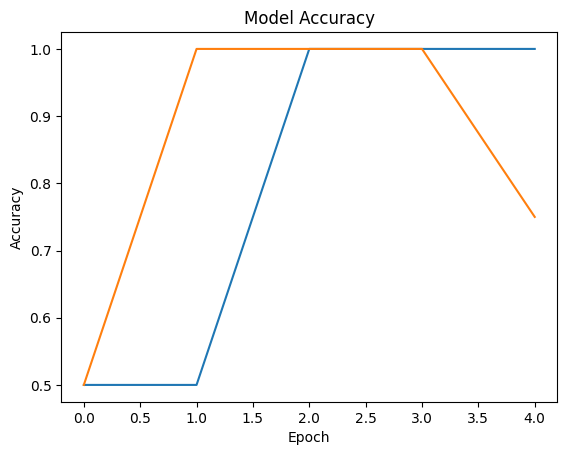

In [22]:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
 
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()
